In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [151]:
data = data.drop(['date', 'street' ,'city','statezip','country'],axis=1)

In [152]:
X = data[['bedrooms',	'bathrooms',	'sqft_living'	,'sqft_lot',	'floors',	'condition',	'sqft_above',	'sqft_basement']]
Y = data[['price']]

In [153]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement
0,3.0,1.50,1340,7912,1.5,3,1340,0
1,5.0,2.50,3650,9050,2.0,5,3370,280
2,3.0,2.00,1930,11947,1.0,4,1930,0
3,3.0,2.25,2000,8030,1.0,4,1000,1000
4,4.0,2.50,1940,10500,1.0,4,1140,800


In [154]:
Y.head()

,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


In [155]:
X.shape

(4600, 8)

In [156]:
Y.shape

(4600, 1)

In [157]:
def model(X,Y,learning_rate,iteration):
  m = Y.size
  theta = np.zeros((8,1))
  cost_list = []

  for i in range(iteration):
    #cost
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    
    d_theta = (1/m)*np.dot(X.T , y_pred - Y)
    theta = theta - learning_rate * d_theta

    cost_list.append(cost)
  return theta,cost_list

In [171]:
iteration = 100
learning_rate = 0.0000000009
theta,cost_list = model(X,Y, learning_rate = learning_rate ,iteration = iteration )

In [165]:
new_house = np.array([[3.0,	1.50,	1340,	7912,	1.5	,3,	1340,	0],
                      [3.0,	2.00,	1930,	11947,	1.0,	4,	1930,	0]
                      ])
np.dot(new_house,theta)

array([[208366.17853246],
       [301591.1117969 ]])

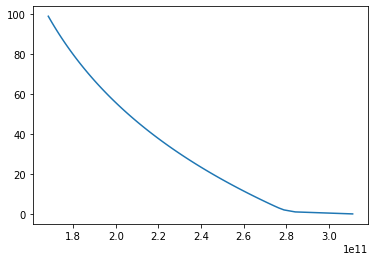

In [172]:
rng=np.arange(0,iteration)
plt.plot(cost_list,rng)
plt.show()